<a href="https://colab.research.google.com/github/Bluelord/EE524/blob/assignments/Assignment6/NileshGupta_206102031/EE524_Assignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EE524 Introduction to Machine Learning Lab**


Name: **Nilesh Gupta**, Ph.D. EEE Department. 

Roll No. **206102031**


In [181]:
# Importing Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [182]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Support Vector Machine:**


In [183]:
#Loading iris the Data from the mounted drive
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
Data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Datafiles/iris.data', names = names)

# Dividing Featurs and Targets labels 
X = np.array(Data.drop('class', axis = 1))
y = np.array(Data.iloc[:,-1])
# Have a look on our data
Data

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [184]:
# Splitting the data 75% Training & 25% Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# SCalling data
scaling = MinMaxScaler()
X_train = scaling.fit_transform(X_train)


In [185]:
# Traing our data with SVM model (linear Kernel)
svcclassifier = SVC(kernel = 'linear', random_state = 42)
svcclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [186]:
# Scaling the test data before predicting 
X_test = scaling.transform(X_test)
# Predicting the Test set results
y_predict = svcclassifier.predict(X_test)
print(y_predict)

['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa']


In [187]:
# Making the Confusion Matrix

matrix = confusion_matrix(y_test, y_predict)
print(matrix)

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


In [188]:
#finding accuracy from the confusion matrix.
a = matrix.shape
corrPred = 0
falsePred = 0
for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
kernelLinearAccuracy = corrPred/(cm.sum())
print ('Accuracy of the SVC Clasification is: ', corrPred/(cm.sum()))

Correct predictions:  37
False predictions 1
Accuracy of the SVC Clasification is:  0.9736842105263158


In [192]:
# Now splitting the Data 80% Traing & 20% test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SCalling data for new set of data
scaling = MinMaxScaler()
X_train = scaling.fit_transform(X_train)

# Traing our data with SVM model (linear Kernel)
svcclassifier = SVC(kernel = 'linear', random_state = 42)
svcclassifier.fit(X_train, y_train)

# Scaling the test data before predicting 
X_test = scaling.transform(X_test)
# Predicting the Test set results
y_predict = svcclassifier.predict(X_test)
print(y_predict)
# Making the Confusion Matrix

matrix = confusion_matrix(y_test, y_predict)
print(matrix)

#finding accuracy from the confusion matrix.
a = matrix.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
print('Correct predictions: \n', corrPred)
print('False predictions: \n', falsePred)
kernelLinearAccuracy = corrPred/(cm.sum())
print ('Accuracy of the SVC Clasification is: ', corrPred/(cm.sum()))

['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa']
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Correct predictions: 
 37
False predictions: 
 1
Accuracy of the SVC Clasification is:  0.9736842105263158


**Principal Component Analysis**



In [193]:
#Loading iris the Data from the mounted drive
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
Data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Datafiles/iris.data', names = names)

# Dividing Featurs and Targets labels 
X = Data.drop('class', axis = 1)
y = Data.iloc[:,-1]

# Encoding classes as "Iris-setosa:0, Iris_versicolor:1, Iris-virginica:2
encoder = LabelEncoder()
y = encoder.fit_transform(y)

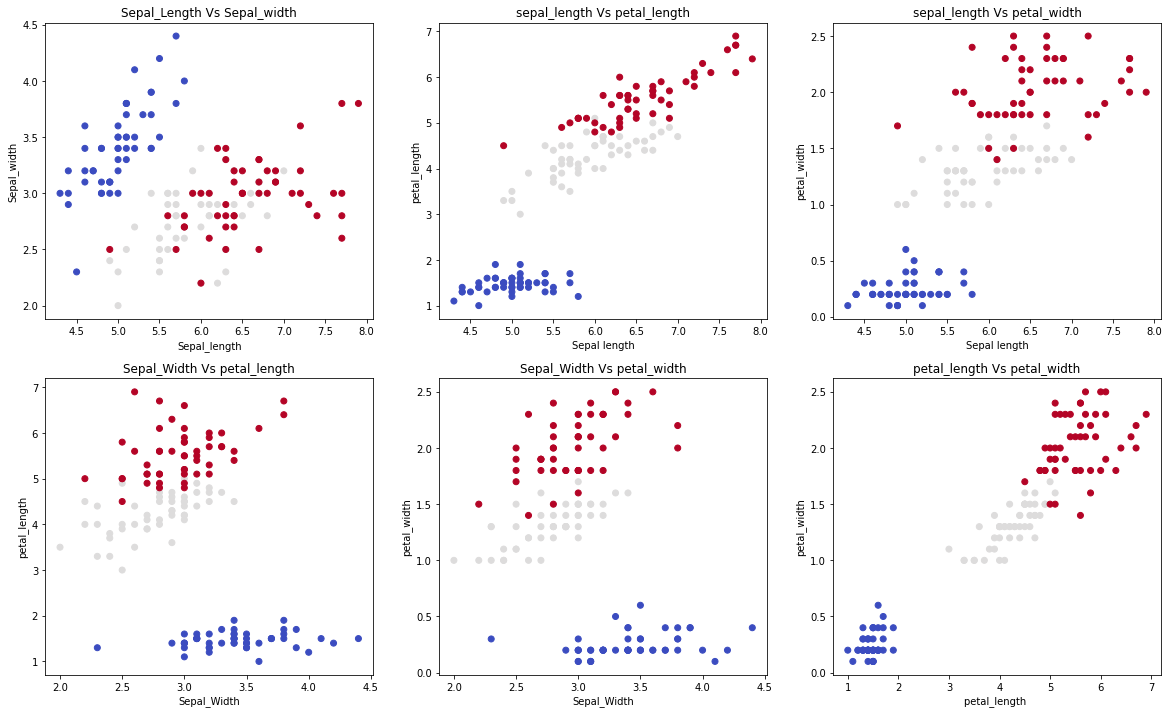

In [194]:
# Visuvalizing the Scatter plots 

fig, axs = plt.subplots(2, 3, figsize=(20,12))

axs[0, 0].scatter(X.iloc[:, 0:1], X.iloc[:, 1:2], c=y, cmap=plt.cm.coolwarm)
axs[0, 0].set_xlabel('Sepal_length')
axs[0, 0].set_ylabel('Sepal_width')
axs[0, 0].set_title('Sepal_Length Vs Sepal_width')

axs[0, 1].scatter(X.iloc[:, 0:1], X.iloc[:, 2:3], c=y, cmap=plt.cm.coolwarm)
axs[0, 1].set_xlabel('Sepal length')
axs[0, 1].set_ylabel('petal_length')
axs[0, 1].set_title('sepal_length Vs petal_length')

axs[0, 2].scatter(X.iloc[:, 0:1], X.iloc[:, 3:4], c=y, cmap=plt.cm.coolwarm)
axs[0, 2].set_xlabel('Sepal length')
axs[0, 2].set_ylabel('petal_width')
axs[0, 2].set_title('sepal_length Vs petal_width')

axs[1, 0].scatter(X.iloc[:, 1:2], X.iloc[:, 2:3], c=y, cmap=plt.cm.coolwarm)
axs[1, 0].set_xlabel('Sepal_Width')
axs[1, 0].set_ylabel('petal_length')
axs[1, 0].set_title('Sepal_Width Vs petal_length')

axs[1, 1].scatter(X.iloc[:, 1:2], X.iloc[:, 3:4], c=y, cmap=plt.cm.coolwarm)
axs[1, 1].set_xlabel('Sepal_Width')
axs[1, 1].set_ylabel('petal_width')
axs[1, 1].set_title('Sepal_Width Vs petal_width')

axs[1, 2].scatter(X.iloc[:, 2:3], X.iloc[:, 3:4], c=y, cmap=plt.cm.coolwarm)
axs[1, 2].set_xlabel('petal_length ')
axs[1, 2].set_ylabel('petal_width')
axs[1, 2].set_title('petal_length Vs petal_width')

plt.show()

In [195]:
# SCalling data Using Minmax Scaler

scaling = MinMaxScaler()
X = scaling.fit_transform(X)

Covariance matrix is a square matrix denoting the covariance of the elements with each other. Covariance of an element with itself is Variance.


In [196]:
# mean Centering the data  
X_meaned = X - np.mean(X , axis = 0)

# calculating the covariance matrix of the mean-centered data.
cov_mat = np.cov(X_meaned , rowvar = False)

The Eigenvectors of Covariance matrix, are Orthogonal to each other and each vector represents a principal axis. A Higher Eigenvalue corresponds to a higher variability. Hence the principal axis with the higher Eigenvalue will be an axis capturing higher variability in the data.

Each column in the Eigen vector-matrix corresponds to a principal component, so arranging them in descending order of their Eigenvalue will automatically arrange the principal component in descending order of their variability.

In [197]:
#Calculating Eigenvalues and Eigenvectors of the covariance matrix
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

#sort the eigenvalues in descending order
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
#similarly sortting  the eigenvectors 
sorted_eigenvectors = eigen_vectors[:,sorted_index]

# select the first 2 eigenvectors
eigenvector_subset = sorted_eigenvectors[:,0:2]

Finally, transform the data by having a dot product between the Transpose of the Eigenvector subset and the Transpose of the mean-centered data. By transposing the outcome of the dot product, the result we get is the data reduced to lower dimensions from higher dimensions.

In [198]:
#Transform the data 
X_reduced = np.dot(eigenvector_subset.transpose(),X_meaned.transpose()).transpose()

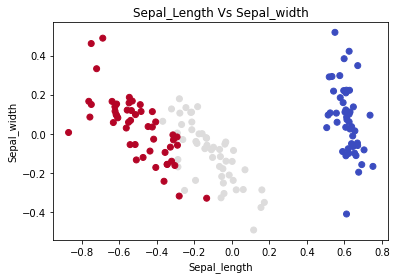

In [199]:
# Visualizing the reduced data.

plt.scatter(X_reduced[:, 0:1], X_reduced[:, 1:2], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal_length')
plt.ylabel('Sepal_width')
plt.title('Sepal_Length Vs Sepal_width')
plt.show()